In [1]:
using ReinforcementLearningAnIntroduction


In [2]:
env = BlackJackEnv(;is_exploring_start=true)

ns, na = length(get_observation_space(env)), length(get_action_space(env))

(220, 2)

In [3]:
agent = Agent(
    policy=ExploringStartPolicy(
        policy=QBasedPolicy(
            learner=MonteCarloLearner(
                approximator=TabularApproximator(;n_state=ns, n_action=na),
                kind=EVERY_VISIT,
                returns=CachedSampleAvg{Tuple{Int, Int}}()
                ),
            explorer=GreedyExplorer()
        ),
        actions=1:na
    ),
    trajectory=EpisodicCompactSARTSATrajectory()
)

run(agent, env, StopAfterEpisode(1000000; is_show_progress=false))

EmptyHook()

In [4]:
using Plots

In [5]:
agent.policy.policy.learner.approximator.table

2×220 Array{Float64,2}:
 0.0  0.0  -0.280744  -0.513922  …  -0.860156  0.00849171  -1.0     
 0.0  0.0  -0.763855  -0.748522      0.420781  0.885012     0.889451

In [6]:
q_value = reshape(agent.policy.policy.learner.approximator.table, 2, 2, 11, 10)
p1 = map(x -> x.I[1], argmax(q_value[:, 1, :, :], dims=1))
p2 = map(x -> x.I[1], argmax(q_value[:, 2, :, :], dims=1));

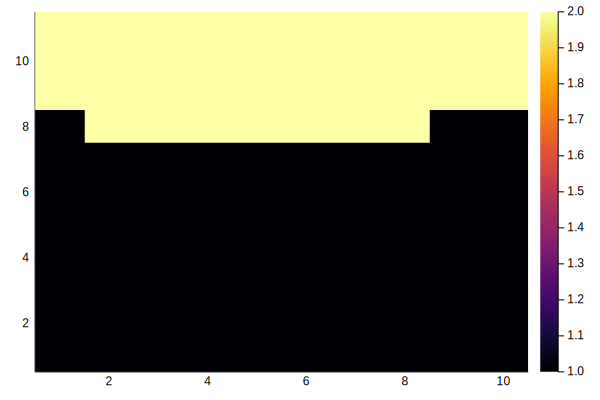

In [7]:
heatmap(dropdims(p1, dims=1))

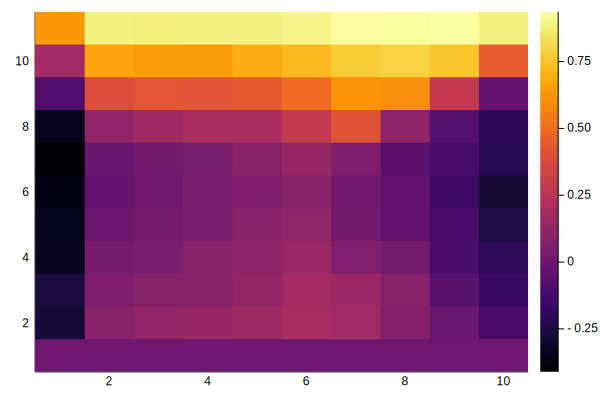

In [8]:
heatmap(dropdims(maximum(q_value[:, 1, :, :]; dims=1), dims=1))

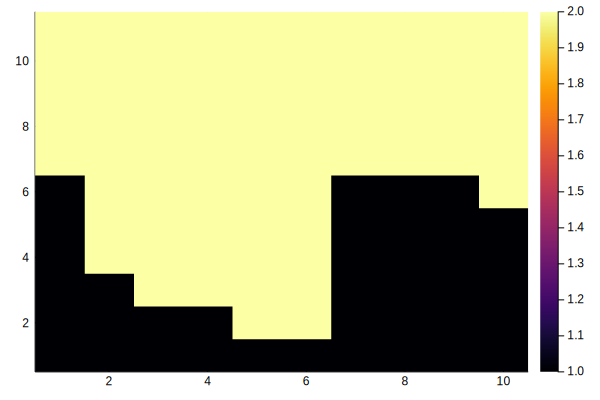

In [9]:
heatmap(dropdims(p2, dims=1))

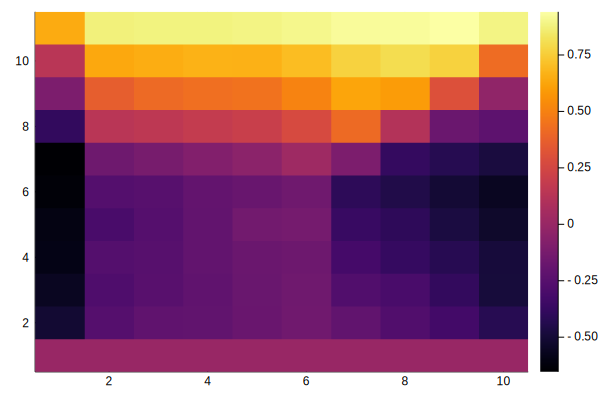

In [10]:
heatmap(dropdims(maximum(q_value[:, 2, :, :]; dims=1), dims=1))